In [3]:
pwd

'/home/connor/repositories/hoim'

In [4]:
# define project directory

project_dir = '/mnt/c/Users/Connor/repositories/hoim'
project_dir = '/home/connor/repositories/hoim'

In [5]:
from utils import load_df, remove_duplicated, best_group
import seaborn as sb
sb.set_color_codes("muted")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os.path import join

In [6]:
# Results dir
results_dir = join(project_dir, 'results')

# dict for all results
dfs_all = {}

In [17]:
sat_dirs = [
#     'sat_3rd_unsat',
            'sat_3rd_no_conj',
#             'sat_square',
            'sat_2nd',
#     'sat_2nd_no_conj'
]
sat_name = {sd: n for sd, n in zip(sat_dirs, ['3rd', '2nd'])}
groupbys = [
#     ['coupling_const', 'shil', 'rho', 'd'],
#             ['rho', 'd', 'coupling_const', 'shil', 'num_cycles', 'normalize'],
    ['rho', 'd', 'coupling_const', 'shil', 'num_cycles'],
            ['min_gap', 'rho', 'd', 'coupling_const', 'shil','num_cycles'],
#     ['min_gap', 'rho', 'd', 'coupling_const', 'shil','num_cycles', 'normalize'],
#             ['min_gap', 'rho', 'd', 'coupling_const', 'shil',]
]
cols = ['coupling_const', 'shil', 'rho', 'd', 'min_gap', 'csp_size', 'normalize', 'valid', 'noise_std',
        'times', 'step', 'num_steps', 'seed', 'energy', 'sample', 'problem', 'num_constraints', 'num_cycles']

def load(sat_dir, groupby):
    data_dir = join(results_dir, sat_dir)
    df = load_df(data_dir, max_entries=None, cols=cols)#, query='rho == 1 & shil in [0.1, 32] & num_cycles in [512, 1024]')#.query('rho == 1 & shil in [0.1, 32] & num_cycles in [512, 1024]')
    print(df.shape)
    df = remove_duplicated(df, [c for c in cols if c in df.columns], True)
    if 'min_gap' not in df.columns:
        df['min_gap'] = 1
    df['model'] = sat_dir
    grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupbys[-1] + ['model'])
    
#     s = grouped.count() 
#     print(s[s > 512].index.tolist())
    
#     df = grouped.filter(lambda x: len(x) > 512 * x['num_steps'].max())
#     df = grouped.filter(lambda x: len(x) >= 512)
    if 'min_gap' in df.columns:
        df = df.query('min_gap in [1, 5, 10, 13]')
    df['energy_fmin'] = 100 * (1 - (df['energy'] / df['num_constraints']))
#     if 'normalize' in df.columns:
#         df['normalize'] = df['normalize'].replace(np.nan, True)
    
    return df

for sat_dir, groupby in zip(sat_dirs, groupbys):
    
    df = load(sat_dir, groupby)
    dfs_all[sat_dir] = df
    
    print(sat_dir, dfs_all[sat_dir].shape)
#     print(df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupby)[['energy', 'valid']].mean().to_string())
    sort_by = ['csp_size', 'energy']
#     if 'min_gap' in df.columns:
        
#         sort_by = sort_by[0:1] + ['min_gap'] + sort_by[1:]
    grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupby)
    # print(grouped.size().to_string())
    # print(grouped[['energy', 'valid']].mean().sort_values(by=sort_by).to_string())
    # print 
    print(grouped[['energy', 'valid']].mean().sort_values(by=sort_by).groupby('csp_size').head(10).round(decimals=2).to_latex())
    
    

  0%|          | 0/3258 [00:00<?, ?it/s]

(13344768, 17)
0 0
sat_3rd_no_conj (13344768, 20)
\begin{tabular}{llllllrr}
\toprule
    &     &      &      &      &      &  energy &  valid \\
csp\_size & rho & d & coupling\_const & shil & num\_cycles &         &        \\
\midrule
20  & 1.0 & -1.0 & 32.0 & 32.0 & 512  &    0.54 &   0.61 \\
    & 2.0 & -2.0 & 64.0 & 64.0 & 512  &    0.67 &   0.33 \\
    & 1.0 & -1.0 & 16.0 & 16.0 & 2048 &    0.75 &   0.38 \\
    & 2.0 & -2.0 & 32.0 & 32.0 & 1024 &    0.75 &   0.38 \\
    &     &      &      &      & 512  &    0.76 &   0.38 \\
    & 1.0 & -1.0 & 16.0 & 16.0 & 512  &    0.77 &   0.38 \\
    &     &      &      &      & 1024 &    0.77 &   0.38 \\
    & 4.0 & -4.0 & 1.0  & 1.0  & 1024 &    0.77 &   0.38 \\
    & 2.0 & -2.0 & 16.0 & 16.0 & 128  &    0.77 &   0.38 \\
    & 1.0 & -1.0 & 1.0  & 1.0  & 1024 &    0.78 &   0.38 \\
50  & 1.0 & -1.0 & 32.0 & 32.0 & 2048 &    0.58 &   0.72 \\
    &     &      &      &      & 1024 &    0.71 &   0.44 \\
    &     &      & 16.0 & 16.0 & 1024 &    0.

  0%|          | 0/3224 [00:00<?, ?it/s]

(12773504, 18)
1881652 0
sat_2nd (9204300, 20)
\begin{tabular}{lllllllrr}
\toprule
    &    &     &      &      &      &      &  energy &  valid \\
csp\_size & min\_gap & rho & d & coupling\_const & shil & num\_cycles &         &        \\
\midrule
20  & 5  & 1.0 & -1.0 & 0.10 & 0.10 & 1024 &    0.66 &   0.51 \\
    & 10 & 1.0 & -1.0 & 0.10 & 0.10 & 1024 &    0.66 &   0.52 \\
    & 5  & 1.0 & -1.0 & 0.10 & 0.10 & 512  &    0.67 &   0.52 \\
    & 10 & 1.0 & -1.0 & 0.10 & 0.10 & 512  &    0.71 &   0.50 \\
    & 1  & 1.0 & -1.0 & 1.10 & 1.10 & 128  &    0.77 &   0.44 \\
    &    &     &      & 1.05 & 1.05 & 128  &    0.77 &   0.44 \\
    & 10 & 0.5 & -0.5 & 0.10 & 0.10 & 1024 &    0.77 &   0.47 \\
    &    & 2.0 & -2.0 & 0.10 & 0.10 & 1024 &    0.78 &   0.46 \\
    &    &     &      & 1.00 & 1.00 & 64   &    0.80 &   0.40 \\
    &    &     &      &      &      & 128  &    0.80 &   0.40 \\
50  & 10 & 2.0 & -2.0 & 1.00 & 1.00 & 128  &    1.30 &   0.20 \\
    &    & 0.5 & -0.5 & 0.10 & 0.10 

/tmp/ipykernel_1875009/2425994774.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_fmin'] = 100 * (1 - (df['energy'] / df['num_constraints']))


In [1]:
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys):    
    df = dfs_all[sat_dir]
    if 'min_gap' not in df.columns:
        df['min_gap'] = 1 #continue
    
    df['model'] = sat_dir
    dfs.append(df)
df = pd.concat(dfs)

#     print(sat_dir, dfs_all[sat_dir].shape)
# grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupbys[-1] + ['model', 'problem'])
# grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupbys[-1] + ['model'])
# # print(grouped.size())
df = grouped.filter(lambda x: len(x) >= 512)
# grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupbys[-1] + ['model', 'problem'])
grouped = df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupbys[-1] + ['model'])
c = grouped.size()

ev = grouped[['energy', 'valid']].mean()
c = grouped.size()
sort_by = sort_by[0:1] + ['min_gap'] + sort_by[1:]
print(pd.concat([ev, c], axis=1).sort_values(by=sort_by).to_string())
# print(pd.concat([ev, c], axis=1).to_string())

#     if 'min_gap' in df.columns:
#         sort_by = sort_by[0:1] + ['min_gap'] + sort_by[1:]
#     print(df[df['step'] == df['num_steps'] - 1].groupby(['csp_size'] + groupby)[['energy', 'valid']].mean().to_string())

NameError: name 'sat_dirs' is not defined

In [17]:
def multihist(x, hue, n_bins=10, color=None, **kws):
#     print(x, hue, n_bins, color, kws)
    bins = np.linspace(x.min(), x.max(), n_bins)
    for n, x_i in x.groupby(hue):
        plt.hist(x_i, bins, label=n, **kws)

In [18]:
data = dfs_all[sat_dirs[0]]
data = data[data['step'] == data['num_steps'] - 1]
fg = sb.FacetGrid(data=data, col='coupling_const', row='num_cycles', sharex=False)
# fg.add_legend()
# plt.yscale('log')
# fg.map_dataframe(sb.histplot, x='energy')
fg.map(multihist,'energy', 'problem', alpha=0.3)
# print(plt.gca().get_legend_handles_labels())
fg.add_legend(handles=plt.gca().get_legend_handles_labels()[0])
# plt.legend()
# plt.tight_layout()


RuntimeError: latex was not able to process the following string:
b'num_cycles = 512 | coupling_const = 32.0'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/connor/.cache/matplotlib/tex.cache/05794d29472f0e5792235c5b2db6e18a.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 05794d29472f0e5792235c5b2db6e18a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily num_
                    cycles = 512 | coupling_const = 32.0}
No pages of output.
Transcript written on 05794d29472f0e5792235c5b2db6e18a.log.




In [117]:
for sat_dir, groupby in zip(sat_dirs, groupbys):
    df = dfs_all[sat_dir] 
    print(df['num_cycles'].unique())
    print(df.duplicated().sum())

[ 128    8    4  256   16 1024    1 2048  512    2   64   32]
0
[ 256    2  128   16   32    4   64  512 1024    8]
0


In [8]:
import seaborn as sb
sb.set(font_scale = 1.1)

# filter_by_col = 'problem' 
filter_by_col = 'csp_size'

problems = set()
for sat_dir in sat_dirs:
    problems = problems | set([p for p in dfs_all[sat_dir][filter_by_col].unique()])
problems = problems.intersection({20, 50, 100, 250})
problems = np.sort(list(problems))
problems




array([ 20,  50, 100, 250])

In [84]:
def tts(g, percent):
#     print(g)
    g = g.sort_values('times')
    thresh = (1 - percent) * g['num_constraints'] #np.maximum(((1 - percent) * (g.energy.max() - g.energy.min())), 0)
    f = g[['times', 'energy']][g['energy'] <= thresh]
    tts = f['times'].min()
    e = g['energy'].min()
#     v = g['valid'].max()
    print(g['energy'].values, e, thresh)
    v = (e <= thresh).max()
#     if g['csp_size'].iloc[0] == 20:
#         print(g['num_constraints'], thresh, g['times'], g['energy'])
#     assert 0
#     print(g['times'][g['energy'] <= thresh])
    return pd.Series({'tts': tts / (2 * np.pi), 'energy': e, 'energy_fmin': g['energy_fmin'].max(), 'valid': v})

p = .95
def best(df, groupby, metric, minimum=True, p=p):
#     df.dropna(axis=1)
    
    grouped = df[df['step'] == (df['num_steps'] - 1)].groupby(groupby)
#     grouped
    if minimum:
        best_group_idx = grouped[metric].mean().argmin()
    else:
        best_group_idx = grouped[metric].mean().argmax()
    best_group = list(grouped.groups.keys())[best_group_idx]
    query = ' & '.join([f'{col} == {v}' for col, v in zip(groupby, best_group)])
    print(query)
    data = df.query(query)
#     print(data)
#     assert 0
    g = data.groupby(['sample', 'problem'])
    t = g.apply(lambda x: tts(x, p)).reset_index()
     
#     e = data.groupby(['sample', 'problem'])['energy']#.mean().reset_index()
#     print(t, e)
#     assert 0
#     t['energy'] = e['energy']
#     data = data.groupby(['sample', 'problem']).apply(lambda x: tts(x, p)).to_frame('tts').reset_index()
    return t

# Find best in terms of valid solution

In [24]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys):
    df = dfs_all[sat_dir].copy()#.query('num_cycles > 16 & num_cycles <= 256')
#     df['energy'] = df['energy'] / df['num_constraints']
    if 'min_gap' in df.columns and '3rd' not in sat_dir:
        for n, g in df.groupby('min_gap'):
            print(n)
            groupby = [c for c in groupby if c != 'min_gap']
            data = g.groupby(['csp_size', ]).apply(lambda x: best(x, groupby, 'valid', False)).reset_index()
            data['model'] = '2nd ' + r' ${\Delta E_{\text{min}}}$' + f'={str(n)}'
            dfs.append(data)
    else:
        data = df.groupby(['csp_size',]).apply(lambda x: best(x, groupby, 'valid', False)).reset_index()
        data['model'] = '3rd' #sat_name[sat_dir]
        dfs.append(data)
data = pd.concat(dfs, ignore_index=True)

rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 512 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 2048 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 8.0 & shil == 8.0 & num_cycles == 256 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1024 & normalize == True
1
rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.1 & num_cycles == 512 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 512 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 256 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.1 & num_cycles == 2 & normalize == True
5
rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.1 & num_cycles == 512 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 1024

In [9]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

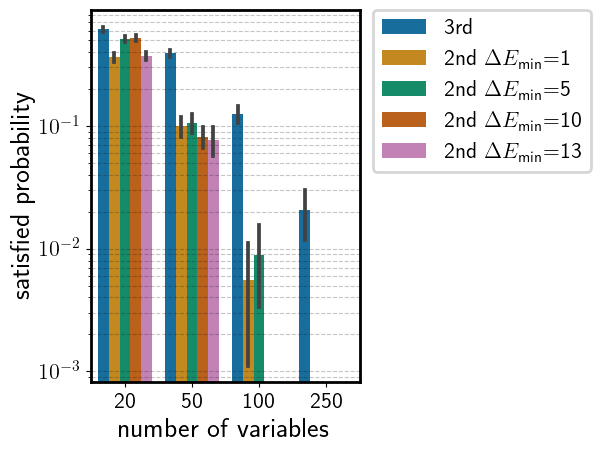

In [16]:
from matplotlib import rc
import matplotlib
# matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
# rc('text', usetex=True)
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
# rc('text', usetex=True)
# rc('axes', linewidth=2)
# rc('font', weight='bold')
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

rc('axes', linewidth=.1)
# rc('font', weight='bold')

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 16
rc('axes', linewidth=.5)
rc('font', weight='bold')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
size = 2
plt.rcParams['axes.linewidth'] = size

data = data.groupby(['csp_size', 'model']).filter(lambda x: x['valid'].mean() > 0)
# data = data[data['valid'] > 0]
# sb.set_palette('colorblind')
sb.barplot(data=data, x='csp_size', y='valid', hue='model')
l = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)

plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
plt.ylabel(r'satisfied probability')
plt.xlabel('number of variables')
plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/sat_prob.pdf')
plt.show()

# Find best in terms of energy

In [12]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys):
    df = dfs_all[sat_dir].copy()#.query('num_cycles > 16 & num_cycles <= 256')
#     df['energy'] = df['energy'] / df['num_constraints']
    if 'min_gap' in df.columns:
        for n, g in df.groupby('min_gap'):
            print(n)
            groupby = [c for c in groupby if c != 'min_gap']
            data = g.groupby(['csp_size', 'num_cycles']).apply(lambda x: best(x, groupby, 'energy')).reset_index()
            data['model'] = sat_name[sat_dir] + fr' $\Delta E_\min$-{str(n)}'
            dfs.append(data)
    else:
        data = df.groupby(['csp_size', 'num_cycles']).apply(lambda x: best(x, groupby, 'energy')).reset_index()
        data['model'] = sat_name[sat_dir]
        dfs.append(data)
data = pd.concat(dfs, ignore_index=True)

rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 2 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 4 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 8 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 16 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 32 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 8.0 & shil == 8.0 & num_cycles == 64 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 128 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 8.0 & shil == 8.0 & num_cycles == 256 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 512 & nor

KeyboardInterrupt: 

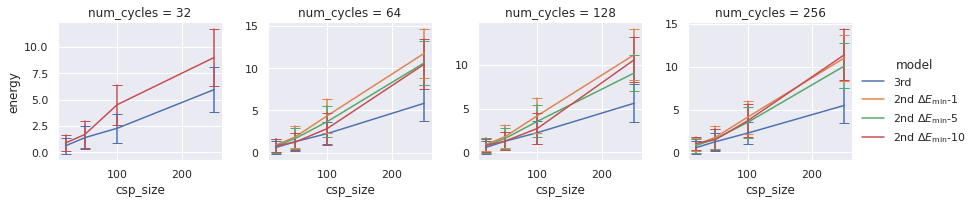

In [13]:


fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharey=False)
fg.map_dataframe(sb.lineplot, x='csp_size', y='energy', ci='sd', err_style='bars', err_kws={'capsize':5})
fg.add_legend()
# plt.legend()
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# plt.ylabel(r'energy')
# plt.xlabel('number of literals')
plt.savefig('figures/energy.pdf')





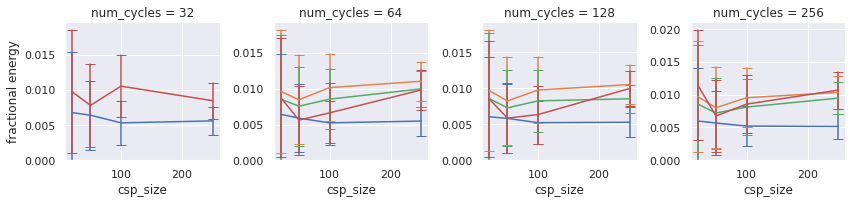

In [14]:
fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharey=False)
fg.map_dataframe(sb.lineplot, x='csp_size', y='energy_fmin', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.add_legend()
# plt.legend()
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
fg.axes.ravel()[0].set_ylabel(r'fractional energy')
for ax in fg.axes.ravel():
    ax.set_ylim([0, ax.get_ylim()[1]])

# plt.ylabel(r'energy')
# plt.xlabel('number of literals')
plt.savefig('figures/energy_fmin.pdf')




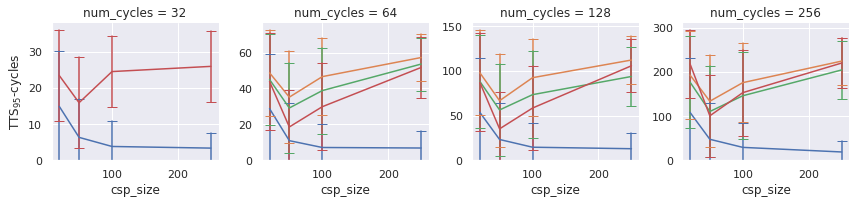

In [15]:
fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharex=False, sharey=False)
fg.map_dataframe(sb.lineplot, x='csp_size', y='tts', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.add_legend()
for ax in fg.axes.ravel():
    ax.set_ylim([0, ax.get_ylim()[1]])
fg.axes.ravel()[0].set_ylabel(r'TTS$_{95}$-cycles')
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# plt.ylabel(r'TTS$_{95}$-cycles')
# plt.xlabel('number of literals')
# plt.yscale('log')
plt.savefig('figures/tts.pdf')



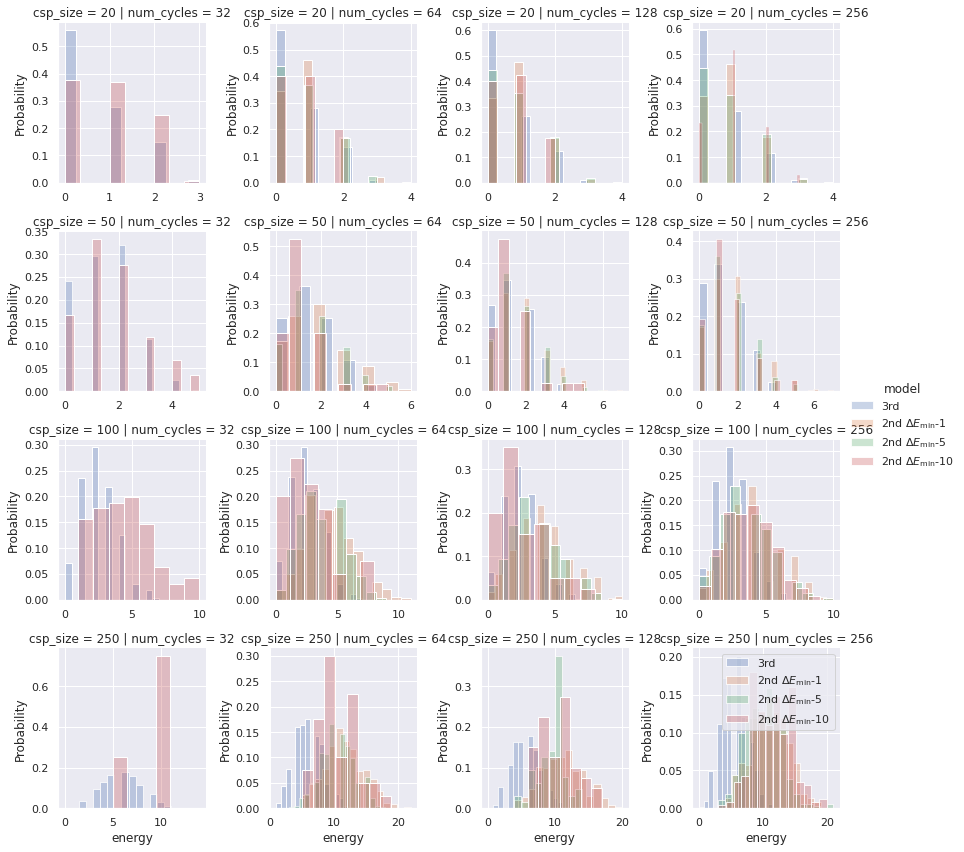

In [16]:
# plt.figure()
# g = sb.lineplot(data=data, x='csp_size', y='tts', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# plt.ylabel(r'TTS$_{95}$-cycles')
# plt.xlabel('number of literals')
# # plt.yscale('log')
# ax =plt.gca()
# ax.grid(b=True, which='minor', color='w', linewidth=1)
# ax.grid(b=True, which='minor', color='w', linewidth=1)


# plt.savefig('figures/tts.pdf')
# # #         print(data)    
# #     g = sb.lineplot(data=data, x='csp_size', y='energy', label=sat_name[sat_dir], ax=a1)
# # #     ax = g.axes.twinx()
# # #     sb.lineplot(data=data, x='csp_size', y='tts', label=sat_name[sat_dir], ax=ax)

fg = sb.FacetGrid(data, row='csp_size', hue='model', col='num_cycles', sharex=False, sharey=False)
fg.map_dataframe(sb.histplot, x='energy', stat='probability', alpha=0.3)
fg.add_legend()
plt.legend()
plt.savefig('figures/histogram_energy.pdf')

In [75]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys):
    df = dfs_all[sat_dir].copy().query('num_cycles <= 2000')
#     df['energy'] = df['energy'] / df['num_constraints']
    if 'min_gap' in df.columns and '3rd' not in sat_dir:
        for n, g in df.groupby('min_gap'):
            print(n)
            groupby = [c for c in groupby if c != 'min_gap']
            data = g.groupby(['csp_size']).apply(lambda x: best(x, groupby, 'energy')).reset_index()
            data['model'] = sat_name[sat_dir] + r' ${\Delta E_{\text{min}}}$' + f'={str(n)}'
            dfs.append(data)
    else:
        data = df.groupby(['csp_size']).apply(lambda x: best(x, groupby, 'energy')).reset_index()
        data['model'] = '3rd'
        dfs.append(data)
data = pd.concat(dfs, ignore_index=True)

rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 512 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1024 & normalize == True
1
rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.1 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 1024 & normalize == True
5
rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.1 & num_cycles == 1024 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycl

In [76]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

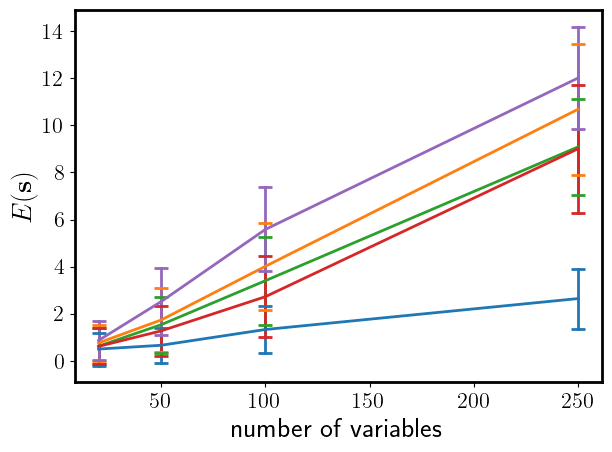

In [77]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
# rc('text', usetex=True)
# rc('axes', linewidth=2)
# rc('font', weight='bold')
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

rc('axes', linewidth=.5)
# rc('font', weight='bold')

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
size = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.linewidth'] = size
plt.rcParams["font.size"] = 16
# plt.plot(x, y, linewidth=1.5)
# sb.set_palette('colorblind')
fg = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, legend=None, linewidth=size)
# fg = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='band', legend=None, linewidth=size)

# fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharey=False)
# fg.map_dataframe(sb.lineplot, x='csp_size', y='energy', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.add_legend()
# plt.legend(title='model')
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
plt.ylabel(r'${E(\mathbf{s})}$')
plt.xlabel('number of variables')
plt.tight_layout()
plt.savefig('figures/energy_models.pdf')
plt.show()

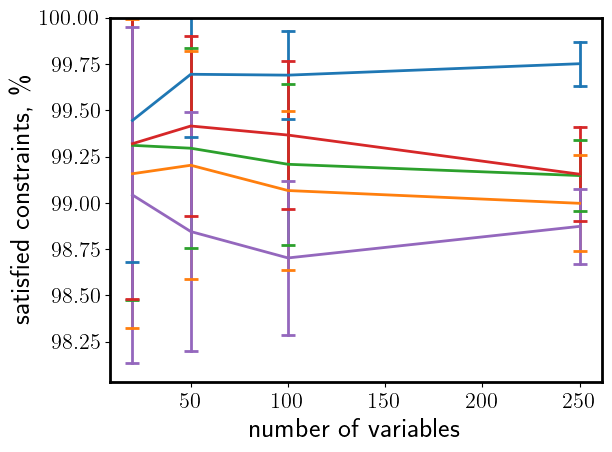

In [78]:
size = 2
# sb.set_palette('colorblind')

fg = sb.lineplot(data=data, x='csp_size', y='energy_fmin', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, legend=None, linewidth=size)
# fg = sb.lineplot(data=data, x='csp_size', y='energy_fmin', hue='model', ci='sd', err_style='band', legend=None, linewidth=size)

# fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharey=False)
# fg.map_dataframe(sb.lineplot, x='csp_size', y='energy_fmin', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.add_legend()
# plt.legend(title='model', loc='lower center')
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.axes.ravel()[0].set_ylabel(r'fractional energy')
# for ax in fg.axes.ravel():
#     ax.set_ylim([0, ax.get_ylim()[1]])

# plt.ylabel(r'% constraints satisfied')
plt.xlabel('number of variables')
plt.ylabel('satisfied constraints, \% ')

ax = plt.gca()
ax.set_ylim([ax.get_ylim()[0], 100])
plt.rcParams['axes.linewidth'] = size

# plt.subplots_adjust(bottom=.25, left=.25)

plt.tight_layout()
plt.savefig('figures/energy_fmin.pdf')
plt.show()



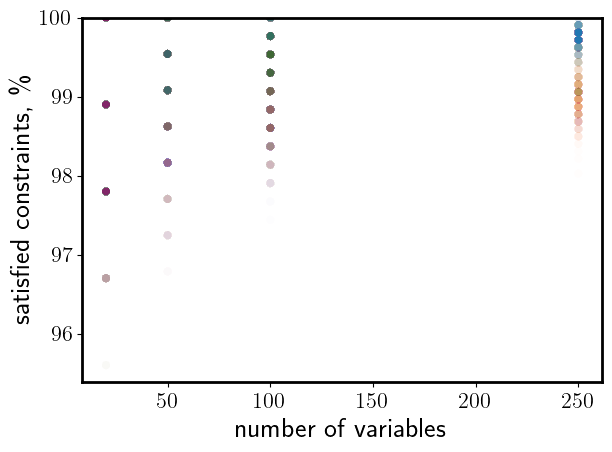

In [88]:
size = 2
# sb.set_palette('colorblind')

fg = sb.scatterplot(data=data, x='csp_size', y='energy_fmin', hue='model', legend=None, alpha=.01)
# fg = sb.lineplot(data=data, x='csp_size', y='energy_fmin', hue='model', ci='sd', err_style='band', legend=None, linewidth=size)

# fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharey=False)
# fg.map_dataframe(sb.lineplot, x='csp_size', y='energy_fmin', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.add_legend()
# plt.legend(title='model', loc='lower center')
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# fg.axes.ravel()[0].set_ylabel(r'fractional energy')
# for ax in fg.axes.ravel():
#     ax.set_ylim([0, ax.get_ylim()[1]])

# plt.ylabel(r'% constraints satisfied')
plt.xlabel('number of variables')
plt.ylabel('satisfied constraints, \% ')

ax = plt.gca()
ax.set_ylim([ax.get_ylim()[0], 100])
plt.rcParams['axes.linewidth'] = size

# plt.subplots_adjust(bottom=.25, left=.25)
# plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/energy_fmin.pdf')
plt.show()



In [10]:
fg = sb.lineplot(data=data, x='csp_size', y='tts', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})

# fg = sb.FacetGrid(data=data, col='num_cycles', hue='model', sharex=False, sharey=False)
# fg.map_dataframe(sb.lineplot, x='csp_size', y='tts', ci='sd', err_style='bars', err_kws={'capsize':5})
# # fg.add_legend()
# for ax in fg.axes.ravel():
#     ax.set_ylim([0, ax.get_ylim()[1]])
# fg.axes.ravel()[0].set_ylabel(r'TTS$_{95}$-cycles')
# g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
# plt.ylabel(r'TTS$_{95}$-cycles')
# plt.xlabel('number of literals')
# plt.yscale('log')
ax = plt.gca()
ax.set_ylim([0, ax.get_ylim()[1]])
plt.savefig('figures/tts.pdf')



NameError: name 'data' is not defined

In [8]:
def tts(g, percent):
#     print(g)
    g = g.sort_values('times')
    thresh = (1 - percent) * g['num_constraints'].mean() #np.maximum(((1 - percent) * (g.energy.max() - g.energy.min())), 0)
    f = g[['times', 'energy']][g['energy'] <= thresh]
    tts = f['times'].min()
    e = g['energy'].min()
#     v = g['valid'].max()
#     print(g['energy'].values, e, thresh)
    v = (e <= thresh)
#     if g['csp_size'].iloc[0] == 250:
#         print(e, thresh, v)
#     assert 0
#     print(e, thresh, v)
    return pd.Series({'tts': tts / (2 * np.pi), 'energy': e, 'energy_fmin': g['energy_fmin'].max(), 'valid': v})

# p = .95
def best(df, groupby, metric, p, minimum=True,):
#     df.dropna(axis=1)
    
    grouped = df[df['step'] == (df['num_steps'] - 1)].groupby(groupby)
#     grouped
    if minimum:
        best_group_idx = grouped[metric].mean().argmin()
    else:
        best_group_idx = grouped[metric].mean().argmax()
    best_group = list(grouped.groups.keys())[best_group_idx]
    query = ' & '.join([f'{col} == {v}' for col, v in zip(groupby, best_group)])
    print(query)
    data = df.query(query)
#     print(data)
#     assert 0
    g = data.groupby(['sample', 'problem'])
    t = g.apply(lambda x: tts(x, p)).reset_index()
     
#     e = data.groupby(['sample', 'problem'])['energy']#.mean().reset_index()
#     print(t, e)
#     assert 0
#     t['energy'] = e['energy']
#     data = data.groupby(['sample', 'problem']).apply(lambda x: tts(x, p)).to_frame('tts').reset_index()
    return t

In [27]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
p= 1
for sat_dir, groupby in zip(sat_dirs[:1], groupbys[:1]):
    df = dfs_all[sat_dir].copy().query('num_cycles < 2048 ')
#     df['energy'] = df['energy'] / df['num_constraints']
    if 'min_gap' in df.columns and '3rd' not in sat_dir:
        for n, g in df.groupby('min_gap'):
            print(n)
            groupby = [c for c in groupby if c != 'min_gap']
            data = g.groupby(['csp_size']).apply(lambda x: best(x, groupby, 'energy', p=p)).reset_index()
            data['model'] = sat_name[sat_dir] + r' ${\Delta E_{min}}$' + f'={str(n)}'
            dfs.append(data)
    else:
#         groupby = [c for c in groupby if c != 'num_cycles']
        data = df.groupby(['csp_size', 'num_cycles']).apply(lambda x: best(x, groupby, 'energy', p=p)).reset_index()
        data['model'] = '3rd'
        dfs.append(data)
data = pd.concat(dfs, ignore_index=True)

rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 1 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 2 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 4 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 8 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 16 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 32 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 64 & normalize == True
rho == 2.0 & d == -2.0 & coupling_const == 16.0 & shil == 16.0 & num_cycles == 128 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 8.0 & shil == 8.0 & num_cycles == 256 & normalize == True
rho == 1.0 & d == -1.0 & coupling_const == 32.0 & shil == 32.0 & num_cycles == 512 & n

In [28]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

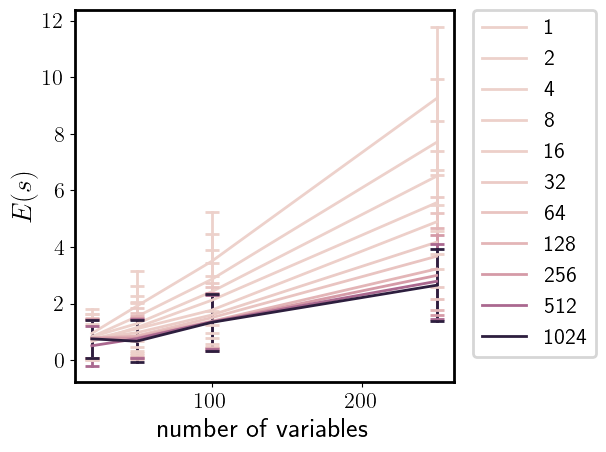

In [29]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
# rc('text', usetex=True)
# rc('axes', linewidth=2)
# rc('font', weight='bold')
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

rc('axes', linewidth=.5)
# rc('font', weight='bold')

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 16
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='energy', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, legend='full', linewidth=size)
l = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)


plt.ylabel(r'${E(s)}$')
plt.xlabel('number of variables')
plt.tight_layout()
plt.savefig('figures/energy_cycles.pdf')
plt.show()

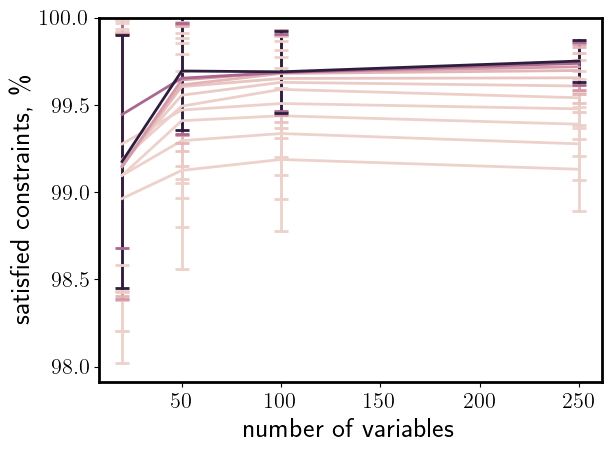

In [30]:
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='energy_fmin', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full')
# fg.add_legend()
# plt.legend()
# plt.legend(title='cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend('', frameon=False)
ax = plt.gca()
# ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylim([ax.get_ylim()[0], 100])
plt.ylabel(r'satisfied constraints, \% ')
plt.xlabel('number of variables')
plt.tight_layout()
plt.savefig('figures/energy_fmin_cycles.pdf')
plt.show()

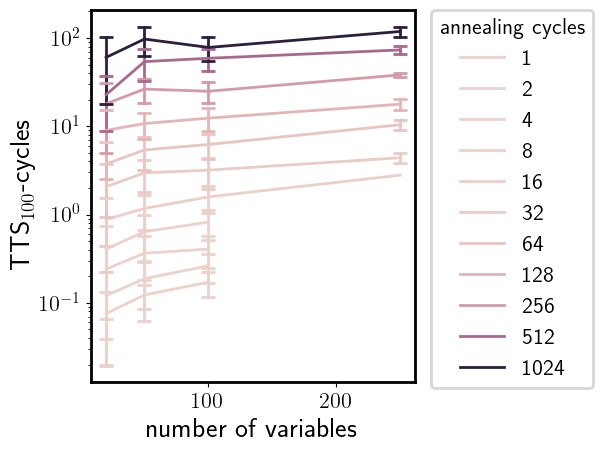

In [31]:
bottom = .15
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='tts', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full')
l = plt.legend(title='annealing cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)
ax = plt.gca()
ax.set_ylabel(fr'TTS$_{{{p*100}}}$-cycles')
ax.set_xlabel('number of variables')
# ax.set_ylim([bottom, ax.get_ylim()[1]])
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.gca().legend().get_frame().set_linewidth(size)
plt.yscale('log', nonpositive='clip')
plt.tight_layout()
plt.savefig(f'figures/tts_cycles_{str(p*100)}_ho.pdf')
plt.show()



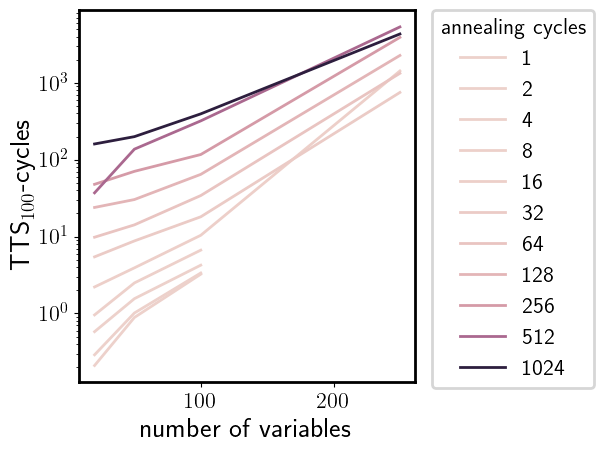

In [32]:
def f(x):
    inds = x['valid'] > 0
    avg_sol = x['valid'].mean()
    avg_sol_time = x[inds]['tts'].mean() / (avg_sol + 10**-12)
    return avg_sol_time
    
bottom = .15
size = 2
d = data.groupby(['csp_size', 'num_cycles']).apply(f).reset_index()
d.columns = list(d.columns)[:-1] + ['tts']
# fg = sb.lineplot(data=d, x='csp_size', y='tts', hue='num_cycles')
# plt.show()

fg = sb.lineplot(data=d, x='csp_size', y='tts', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full')
l = plt.legend(title='annealing cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)
ax = plt.gca()
ax.set_ylabel(fr'TTS$_{{{p*100}}}$-cycles')
ax.set_xlabel('number of variables')
# ax.set_ylim([bottom, ax.get_ylim()[1]])
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.gca().legend().get_frame().set_linewidth(size)
plt.yscale('log', nonpositive='clip')
plt.tight_layout()
plt.savefig(f'figures/tts_cycles_{str(p*100)}_ho.pdf')
plt.show()

In [33]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
p= 1.00
for sat_dir, groupby in zip(sat_dirs[1:], groupbys[1:]):
    df = dfs_all[sat_dir].copy().query('num_cycles < 2048 ')
#     df['energy'] = df['energy'] / df['num_constraints']
#     if 'min_gap' in df.columns and '3rd' not in sat_dir:
#         for n, g in df.groupby('min_gap'):
#             print(n)
#             groupby = [c for c in groupby if c != 'min_gap']
#             data = g.groupby(['csp_size']).apply(lambda x: best(x, groupby, 'energy', p=p)).reset_index()
#             data['model'] = sat_name[sat_dir] + r' ${\Delta E_{min}}$' + f'={str(n)}'
#             dfs.append(data)
#     else:
#         groupby = [c for c in groupby if c != 'num_cycles']
    data = df.groupby(['csp_size', 'num_cycles']).apply(lambda x: best(x, groupby, 'energy', p=p)).reset_index()
    data['model'] = '3rd'
    dfs.append(data)
data = pd.concat(dfs, ignore_index=True)

min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 2 & normalize == True
min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 4 & normalize == True
min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 8 & normalize == True
min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 16 & normalize == True
min_gap == 10 & rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 32 & normalize == True
min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 64 & normalize == True
min_gap == 10 & rho == 2.0 & d == -2.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 128 & normalize == True
min_gap == 5 & rho == 1.0 & d == -1.0 & coupling_const == 1.0 & shil == 1.0 & num_cycles == 256 & normalize == True
min_gap == 5 & rho == 1.0 & d == -1.0 & coupling_const == 0.1 & shil == 0.

In [34]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

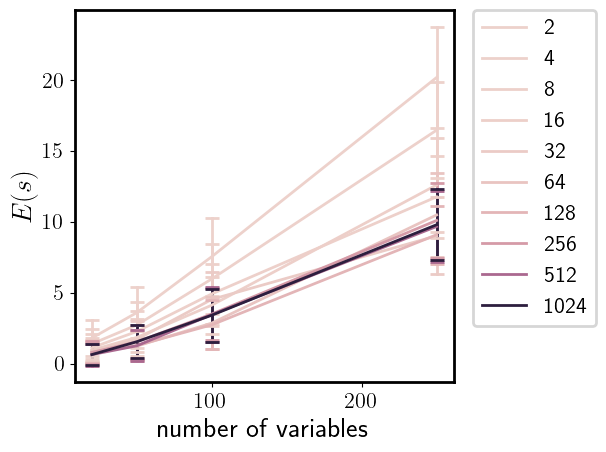

In [35]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
# rc('text', usetex=True)
# rc('axes', linewidth=2)
# rc('font', weight='bold')
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

rc('axes', linewidth=.5)
# rc('font', weight='bold')

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 16
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='energy', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, legend='full', linewidth=size)
l = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)


plt.ylabel(r'${E(s)}$')
plt.xlabel('number of variables')
plt.tight_layout()
plt.savefig('figures/energy_cycles.pdf')
plt.show()

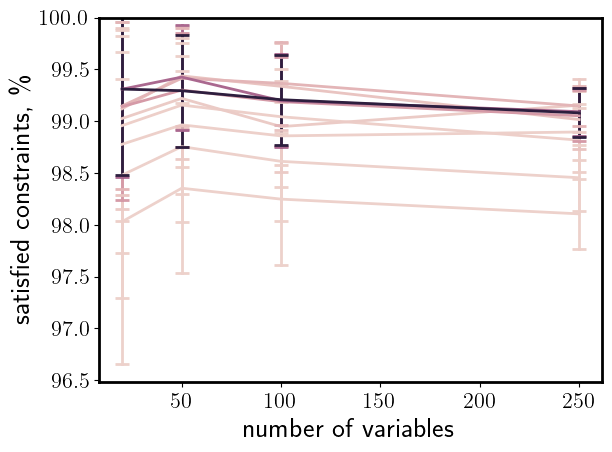

In [36]:
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='energy_fmin', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full')
# fg.add_legend()
# plt.legend()
# plt.legend(title='cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend('', frameon=False)
ax = plt.gca()
# ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylim([ax.get_ylim()[0], 100])
plt.ylabel(r'satisfied constraints, \% ')
plt.xlabel('number of variables')
plt.tight_layout()
plt.savefig('figures/energy_fmin_cycles.pdf')
plt.show()

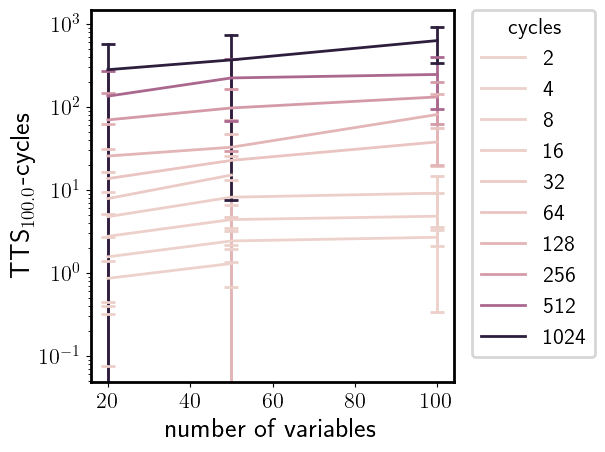

In [37]:
bottom = .15
size = 2
plt.rcParams['axes.linewidth'] = size
fg = sb.lineplot(data=data, x='csp_size', y='tts', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full')
l = plt.legend(title='cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)
ax = plt.gca()
ax.set_ylabel(fr'TTS$_{{{p*100}}}$-cycles')
ax.set_xlabel('number of variables')
# ax.set_ylim([bottom, ax.get_ylim()[1]])
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.gca().legend().get_frame().set_linewidth(size)
plt.yscale('log', nonpositive='clip')
plt.tight_layout()
plt.savefig(f'figures/tts_cycles_{str(p*100)}_so.pdf')
plt.show()



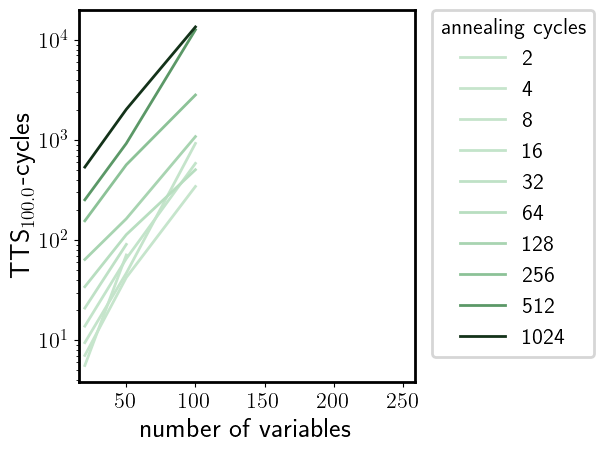

In [46]:
def f(x):
    inds = x['valid'] > 0
    avg_sol = x['valid'].mean()
    avg_sol_time = x[inds]['tts'].mean() / (avg_sol + 10**-12)
    return avg_sol_time
    
    
d = data.groupby(['csp_size', 'num_cycles']).apply(f).reset_index()
d.columns = list(d.columns)[:-1] + ['tts']
# fg = sb.lineplot(data=d, x='csp_size', y='tts', hue='num_cycles')
# plt.show()

fg = sb.lineplot(data=d, x='csp_size', y='tts', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5, 'elinewidth':size, 'capthick':size}, linewidth=size, legend='full', palette="ch:start=2,rot=0")
l = plt.legend(title='annealing cycles', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
l.get_frame().set_linewidth(size)
for line in l.get_lines():
    line.set_linewidth(size)
ax = plt.gca()
ax.set_xlabel('number of variables')
# ax.set_ylim([bottom, ax.get_ylim()[1]])
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.grid(which='both', color='k', linestyle='--', axis='y', alpha=0.25)
# plt.gca().legend().get_frame().set_linewidth(size)
ax.set_ylabel(fr'TTS$_{{{p*100}}}$-cycles')

xlim = plt.xlim()
xlim = (xlim[0], xlim[1] * 2.49)
ylim = plt.ylim()
ylim = (ylim[0], ylim[1]  *2.5)
plt.xlim(xlim)
# plt.ylim(ylim)

plt.yscale('log', nonpositive='clip')
plt.tight_layout()

plt.savefig(f'figures/tts_cycles_{str(p*100)}_so.pdf')
plt.show()

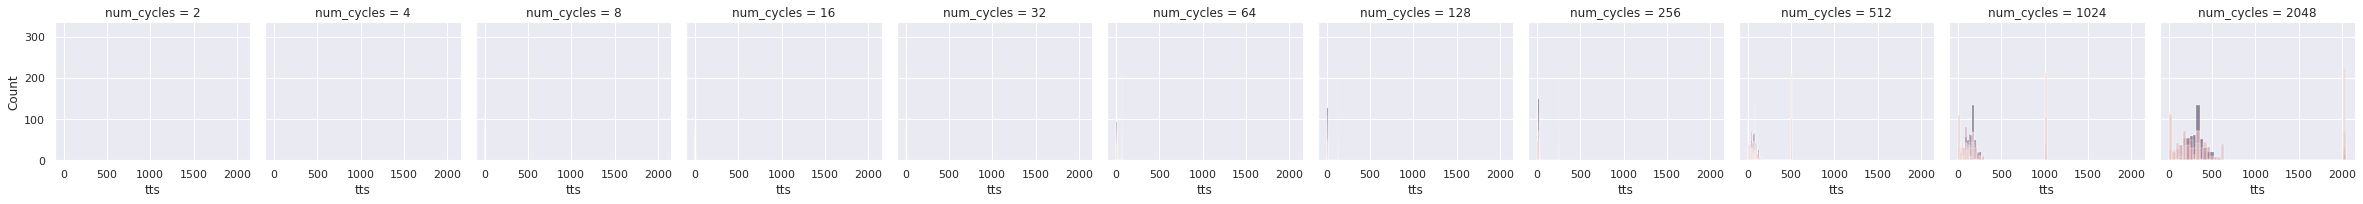

In [59]:
fg = sb.FacetGrid(data=data, col='num_cycles')
fg.map_dataframe(sb.histplot, x='tts', hue='csp_size')

In [ ]:
fg = sb.histplot(data=data.replace(to_replace={'tts': 0}, value=bottom), x='csp_size', y='tts', hue='num_cycles', ci='sd', err_style='bars', err_kws={'capsize':5})


In [51]:
data.replace(to_replace={'tts': 0}, value=10**-2)['tts']

0           0.158730
1           0.010000
2           2.000000
3           2.000000
4           0.253968
            ...     
22523     227.555568
22524     422.603196
22525    2048.000057
22526     487.619078
22527    2048.000057
Name: tts, Length: 22528, dtype: float64

In [ ]:
sb.set(rc = {'figure.figsize':(7,4)})
# f1, a1 = plt.subplots()
# f2, a2 = plt.subplots()
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys):
    df = dfs_all[sat_dir].copy()
#     df['energy'] = df['energy'] / df['num_constraints']
    data = df.groupby('csp_size').apply(lambda x: best(x, groupby, 'energy')).reset_index()
    data['model'] = sat_name[sat_dir]
    dfs.append(data)
data = pd.concat(dfs, ignore_index=True)
g = sb.lineplot(data=data, x='csp_size', y='energy', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
plt.ylabel(r'energy')
plt.xlabel('number of literals')
plt.savefig('figures/energy.pdf')

plt.figure()
g = sb.lineplot(data=data, x='csp_size', y='tts', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
plt.ylabel(r'TTS$_{95}$-cycles')
plt.xlabel('number of literals')
# plt.yscale('log')
ax =plt.gca()
ax.grid(b=True, which='minor', color='w', linewidth=1)
ax.grid(b=True, which='minor', color='w', linewidth=1)


plt.savefig('figures/tts.pdf')
# #         print(data)    
#     g = sb.lineplot(data=data, x='csp_size', y='energy', label=sat_name[sat_dir], ax=a1)
# #     ax = g.axes.twinx()
# #     sb.lineplot(data=data, x='csp_size', y='tts', label=sat_name[sat_dir], ax=ax)

fg = sb.FacetGrid(data, col='csp_size', hue='model', sharex=False, sharey=False)
fg.map_dataframe(sb.histplot, x='energy', stat='probability')
fg.add_legend()
# plt.legend()
plt.savefig('figures/histogram_energy.pdf')



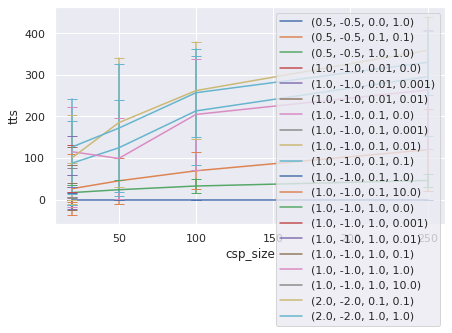

In [149]:
dfs = []
for sat_dir, groupby in zip(sat_dirs, groupbys[:1]):
    df = dfs_all[sat_dir]
    g = df.groupby(['csp_size', 'problem', 'sample'] + groupby)
    data = g.apply(lambda x: tts(x, p)).to_frame('tts').reset_index()
    for n, g in data.groupby(groupby):
        g = sb.lineplot(data=g, x='csp_size', y='tts', ci='sd', err_style='bars', err_kws={'capsize':5}, label=str(n))
plt.legend(
#     print(data)
#     g = sb.lineplot(data=data, x='csp_size', y='tts', hue='model', ci='sd', err_style='bars', err_kws={'capsize':5})
    
#     mean = df.groupby(['csp_size'] + groupby)['energy'].mean()
#     t = t.groupby(['csp_size'] + groupby)['tts'].mean()
#     t = t.reset_index()
# #     print(mean, t)
#     t['energy'] = mean.values
# #     print(t)
# #     t = t.reset_index()
#     t = t.groupby(['csp_size'] + groupby)[['tts', 'energy']].mean().reset_index()
#     print(sat_dir, t)

In [104]:
data

,csp_size,level_1,sample,problem,tts,energy,label
0,20,0,0,uf20-01.cnf,16.253969,0.390625,3rd
1,20,1,0,uf20-02.cnf,32.507939,1.156250,3rd
2,20,2,0,uf20-03.cnf,243.809539,0.671875,3rd
3,20,3,0,uf20-04.cnf,325.079392,1.500000,3rd
4,20,4,1,uf20-01.cnf,16.253969,0.390625,3rd
...,...,...,...,...,...,...,...
2747,250,123,61,uf250-02.cnf,247.873041,18.156250,2nd_s
2748,250,124,62,uf250-01.cnf,117.841277,17.000000,2nd_s
2749,250,125,62,uf250-02.cnf,199.111130,18.328125,2nd_s
2750,250,126,63,uf250-01.cnf,235.682554,18.562500,2nd_s


/tmp/ipykernel_54015/138087705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['energy'] = np.stack(data['energy'].values)


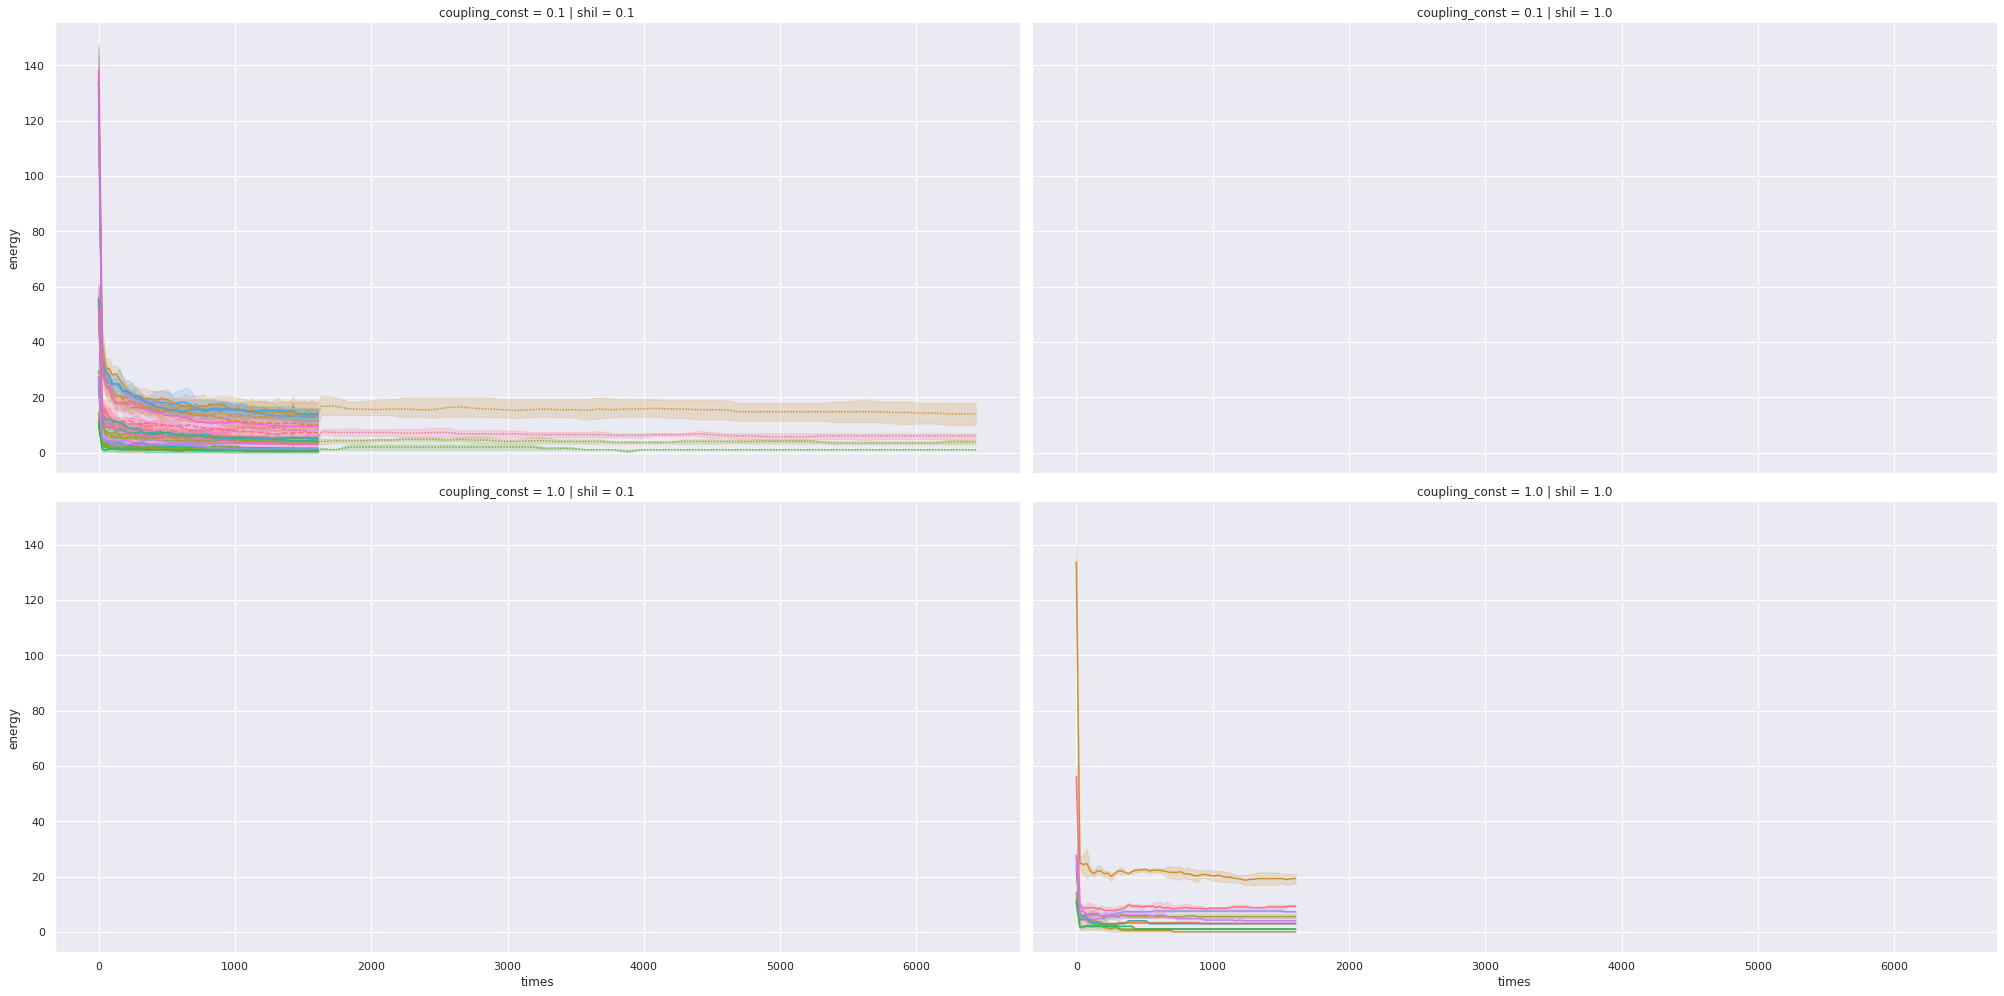

In [54]:
sb.set(rc = {'figure.figsize':(7,4)})

data = dfs_all[sat_dirs[1]][['coupling_const', 'shil', 'csp_size', 'times', 'energy', 'min_gap', 'problem']]
data['energy'] = np.stack(data['energy'].values)
fg = sb.FacetGrid(data, row='coupling_const', col='shil', hue='problem', height=7, aspect=2)
fg.map_dataframe(sb.lineplot, x='times', y='energy', style='min_gap')


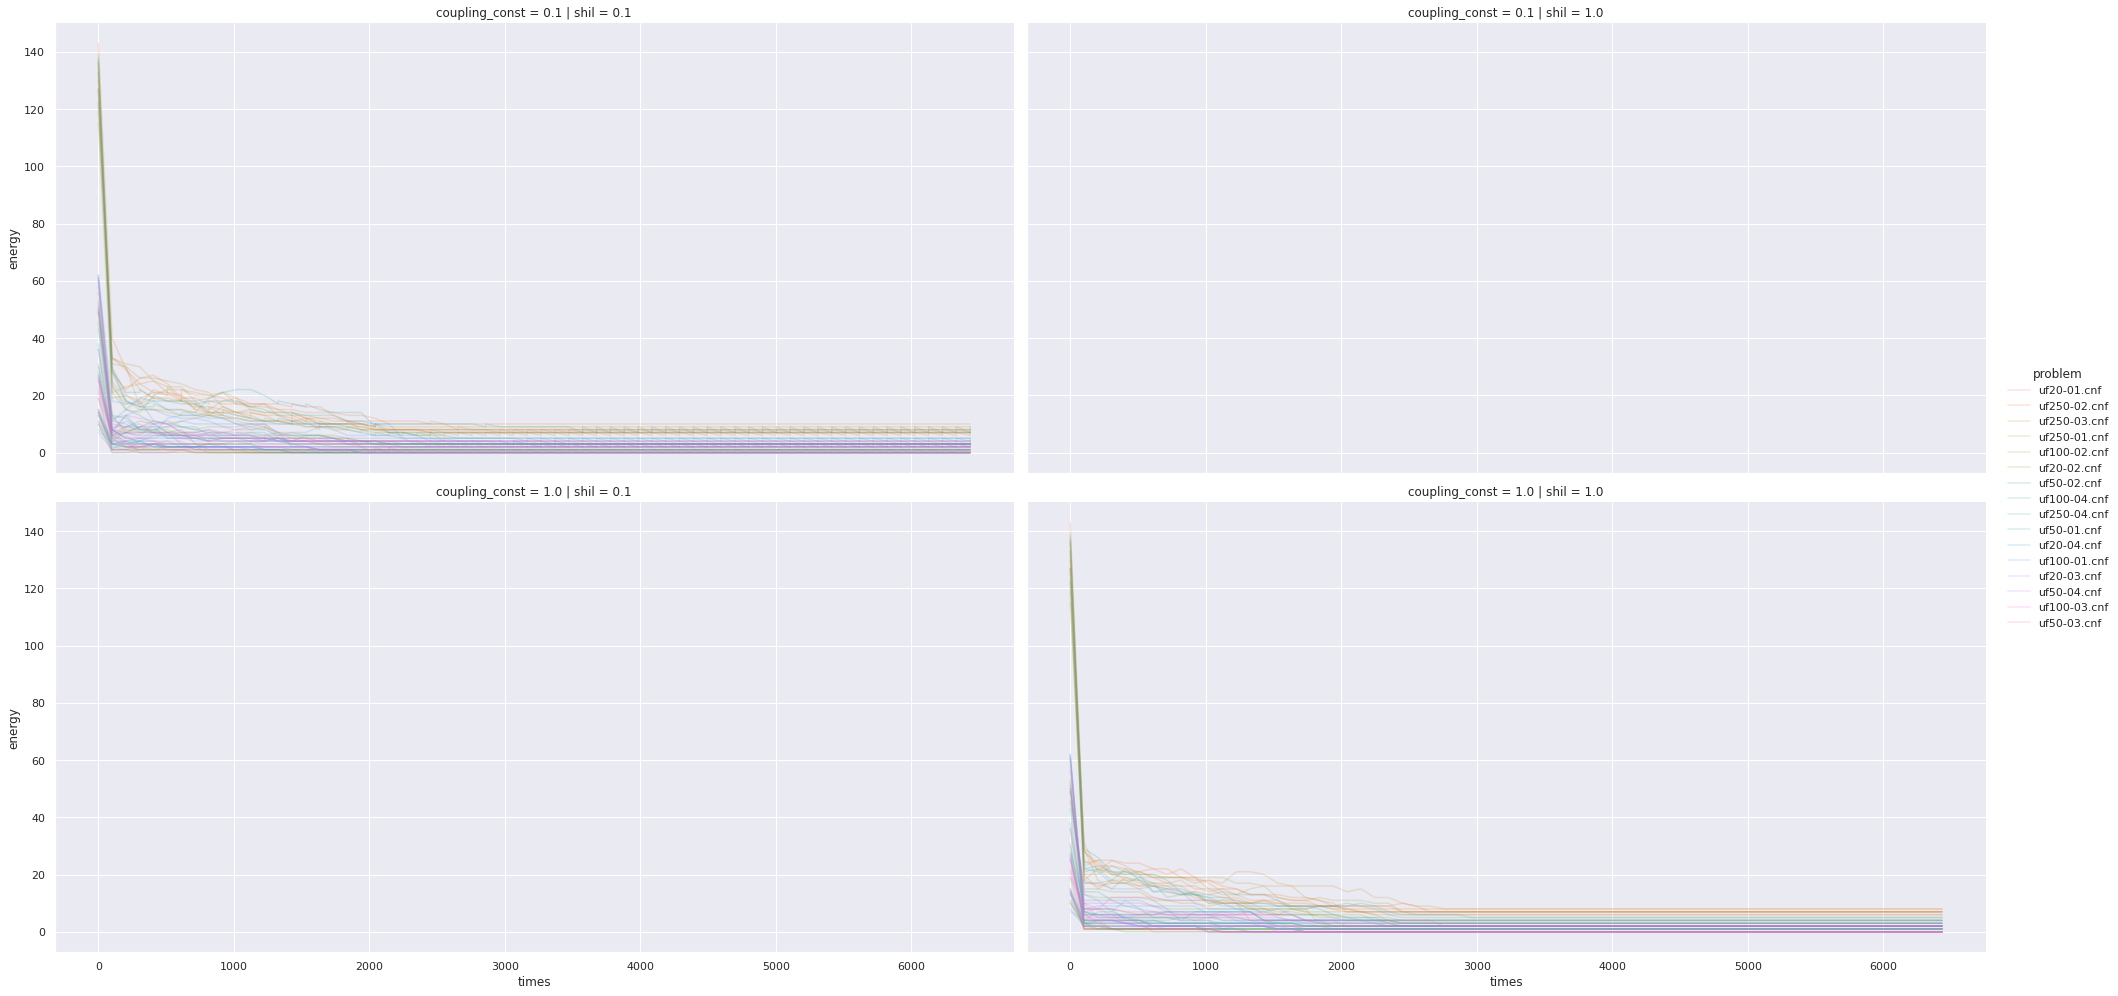

In [31]:
data = dfs_all[sat_dirs[0]][['coupling_const', 'shil', 'csp_size', 'times', 'energy', 'sample', 'problem']]
fg = sb.FacetGrid(data, row='coupling_const', col='shil', hue='problem', height=7, aspect=2)
fg.map_dataframe(sb.lineplot, x='times', y='energy', estimator=None, units='sample', alpha=0.2)
fg.add_legend()

In [70]:
data = dfs_all[sat_dirs[1]].query('rho == 0.5')[['coupling_const', 'shil', 'csp_size', 'times', 'energy']]
fg = sb.FacetGrid(data, row='coupling_const', col='shil', hue='csp_size')
fg.map_dataframe(sb.lineplot, x='times', y='energy')
fg.add_legend()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 0x0 with 0 Axes>

In [ ]:
fg = sb.FacetGrid(
for sat_dir, groupby in zip(sat_dirs, groupbys):


In [ ]:
#Query string
dir_name = 'sat_3rd'
data_dir = join(results_dir, dir_name)
df = load_df(data_dir, max_entries=None)
dfs_all[dir_name] = df
dfs_all[dir_name].shape

In [ ]:
dfs = dfs_all[dir_name]
dfs = dfs.dropna(axis=1)
groupby = ['coupling_const', 'shil', 'rho', 'd', 'seed', 'solver', 'noise_std', 'step_size', 'problem', 'dual_rate', 'step']
dup = dfs.duplicated(groupby)
dfs = dfs[~dup]
dup.sum(), dfs.duplicated(groupby).sum()

In [22]:
dir_name = 'sat_2nd'
data_dir = join(results_dir, dir_name)
df = load_df(data_dir, max_entries=1024)
dfs_all[dir_name] = df
dfs_all[dir_name].shape

(26624, 13808)

In [23]:
dfs = dfs_all[dir_name]
dfs = dfs.dropna(axis=1)
groupby = ['coupling_const', 'shil', 'rho', 'd', 'seed', 'solver', 'noise_std', 'step_size', 'problem', 'dual_rate', 'step']
dup = dfs.duplicated(groupby)
dfs = dfs[~dup]
dup.sum(), dfs.duplicated(groupby).sum()

(0, 0)

In [31]:
dfs_all['sat_3rd'].csp_size.unique()

array([ 50, 250,  20, 100])

Compute time to solution (TTS) as the time to 99% of the lowest energy during simulation.

In [32]:
def tts(g, percent):
    g = g.sort_values('times')
    thresh = np.maximum(np.ceil((1 - percent) * (g.energy.max() - g.energy.min())), g.energy.min())
    tts = g['times'][g['energy'] <= thresh].min()
    return tts / (2 * np.pi)

groupby = ['coupling_const', 'shil', 'csp_size', 'sample']
data_3rd = dfs_all['sat_3rd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()
data_3rd['model'] = '3rd'

data_2nd = dfs_all['sat_2nd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()
data_2nd['model'] = '2nd'


In [37]:
pd.concat([data_3rd, data_2nd]).reset_index()

,index,coupling_const,shil,csp_size,sample,tts,model
0,0,0.01,0.01,250,0,186.920642,3rd
1,1,0.01,0.01,250,1,211.301598,3rd
2,2,0.01,0.01,250,2,125.968262,3rd
3,3,0.01,0.01,250,3,174.730174,3rd
4,4,0.10,0.10,20,0,4.063492,3rd
5,5,0.10,0.10,20,1,12.190477,3rd
6,6,0.10,0.10,20,2,32.507939,3rd
7,7,0.10,0.10,20,3,146.285725,3rd
8,8,1.00,1.00,20,0,4.063492,3rd
9,9,1.00,1.00,20,1,8.126985,3rd


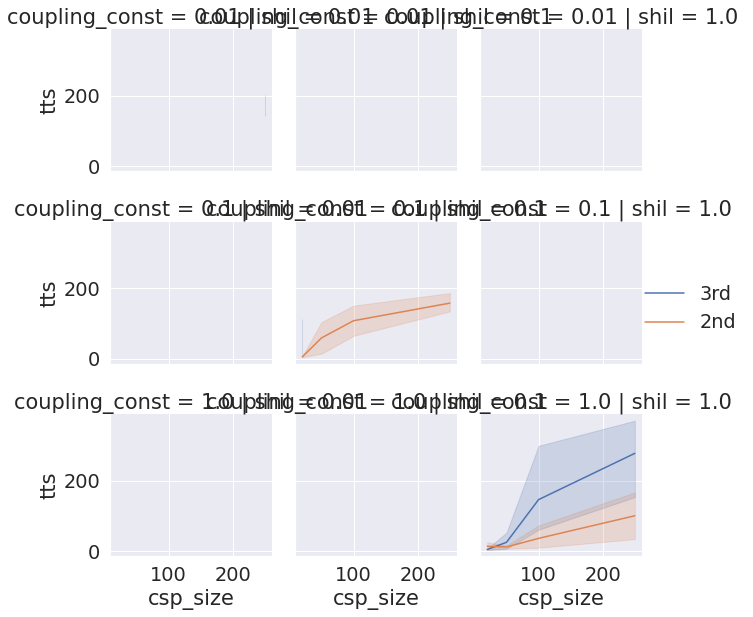

In [38]:
fg = sb.FacetGrid(pd.concat([data_3rd, data_2nd]).reset_index(), row='coupling_const', col='shil')
fg.map_dataframe(sb.lineplot, x='csp_size', y='tts', hue='model')
# plt.yscale('log')
# plt.xscale('log')
fg.add_legend()

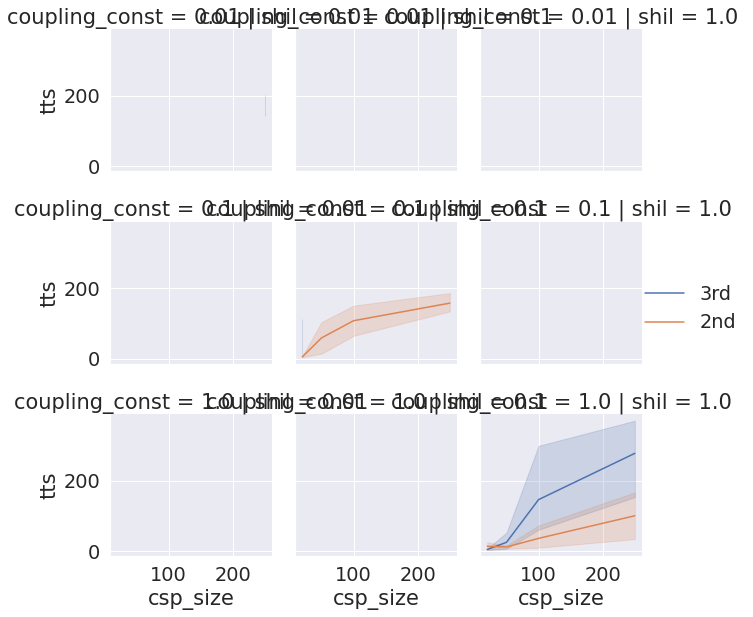

In [38]:
fg = sb.FacetGrid(pd.concat([data_3rd, data_2nd]).reset_index(), row='coupling_const', col='shil')
fg.map_dataframe(sb.lineplot, x='csp_size', y='tts', hue='model')
# plt.yscale('log')
# plt.xscale('log')
fg.add_legend()

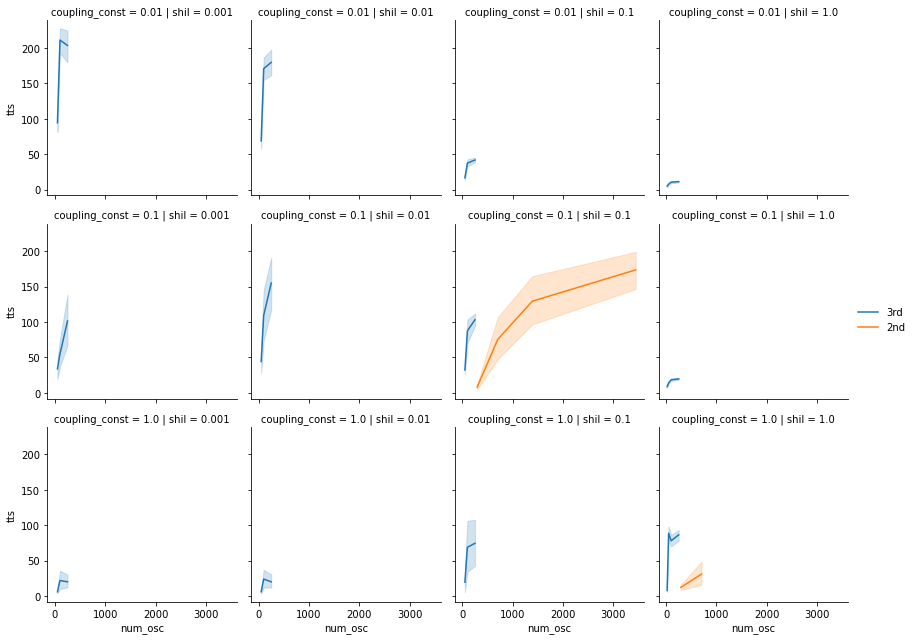

In [16]:
groupby = ['coupling_const', 'shil', 'num_osc', 'sample']
data_3rd = dfs_all['sat_3rd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()
data_3rd['model'] = '3rd'

data_2nd = dfs_all['sat_2nd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()
data_2nd['model'] = '2nd'

fg = sb.FacetGrid(pd.concat([data_3rd, data_2nd]), row='coupling_const', col='shil')
fg.map_dataframe(sb.lineplot, x='num_osc', y='tts', hue='model')
# plt.yscale('log')
# plt.xscale('log')
fg.add_legend()

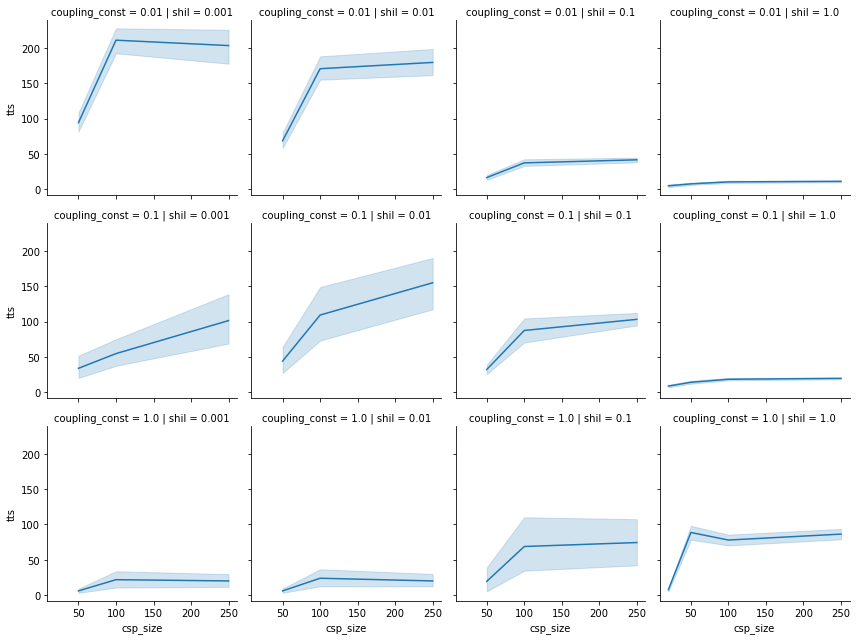

In [34]:

    
groupby = ['coupling_const', 'shil', 'rho', 'd', 'seed', 'csp_size', 'sample']
data_3rd = dfs_all['sat_3rd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()


fg = sb.FacetGrid(data_3rd, row='coupling_const', col='shil')
fg.map_dataframe(sb.lineplot, x='csp_size', y='tts')

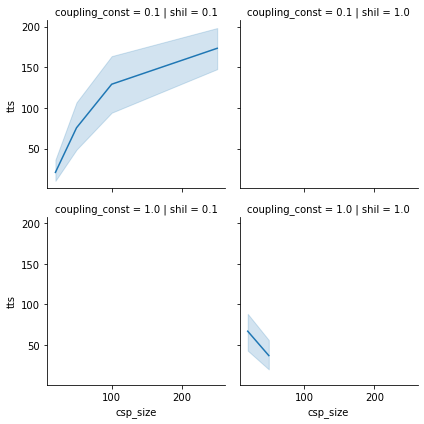

In [16]:

groupby = ['coupling_const', 'shil', 'rho', 'd', 'seed', 'csp_size', 'sample']
data_2nd = dfs_all['sat_2nd'].groupby(groupby).apply(lambda x: tts(x, 0.99)).to_frame('tts').reset_index()


fg = sb.FacetGrid(data_2nd, row='coupling_const', col='shil')
fg.map_dataframe(sb.lineplot, x='csp_size', y='tts')

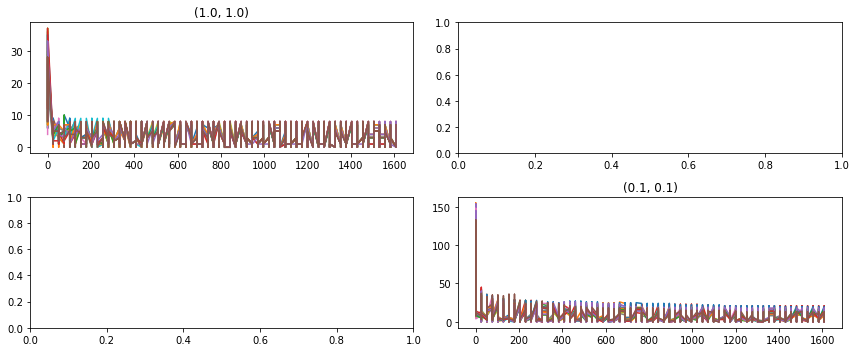

In [27]:
data = dfs_all['sat_2nd']
col = 'coupling_const'
row = 'shil'
# figure = 'shil'
col_values = {v: i for i, v in enumerate(data[col].unique())}
row_values = {v: i for i, v in enumerate(data[row].unique())}
ncols = len(data[col].unique())
nrows = len(data[row].unique())

# data = dfs.query('dual_rate == 0.')
# for name1, group1 in dfs.groupby('shil'):
    
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 5))

grouped = data.groupby([row, col])
# fig, axs = plt.subplots(1, len(grouped), figsize=(21, 10))
for name, group in grouped:
#     print(name)
    i, j = row_values[name[0]], col_values[name[1]]
    for n, g in group.groupby('sample'):
        g = g.sort_values('times')
        axs[i][j].plot(g['times'], g['energy'])
#     axs[i][j].set_yscale('log')
#         print(name)
    axs[i][j].set_title(str(name))
# fig.suptitle(f'SHIL {name1}')
# plt.yscale('log')
plt.tight_layout()
plt.show()

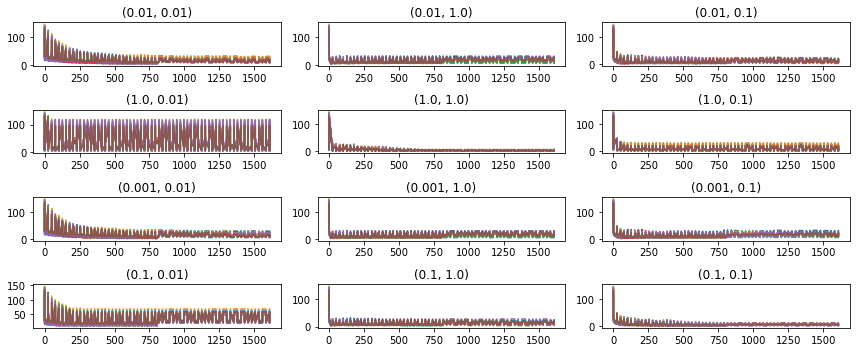

In [26]:
data = dfs_all['sat_3rd']
col = 'coupling_const'
row = 'shil'
# figure = 'shil'
col_values = {v: i for i, v in enumerate(data[col].unique())}
row_values = {v: i for i, v in enumerate(data[row].unique())}
ncols = len(data[col].unique())
nrows = len(data[row].unique())

# data = dfs.query('dual_rate == 0.')
# for name1, group1 in dfs.groupby('shil'):
    
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 5))

grouped = data.groupby([row, col])
# fig, axs = plt.subplots(1, len(grouped), figsize=(21, 10))
for name, group in grouped:
#     print(name)
    i, j = row_values[name[0]], col_values[name[1]]
    for n, g in group.groupby('sample'):
        g = g.sort_values('times')
        axs[i][j].plot(g['times'], g['energy'])
#     axs[i][j].set_yscale('log')
#         print(name)
    axs[i][j].set_title(str(name))
# fig.suptitle(f'SHIL {name1}')
# plt.yscale('log')
plt.tight_layout()
plt.show()